In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
#loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


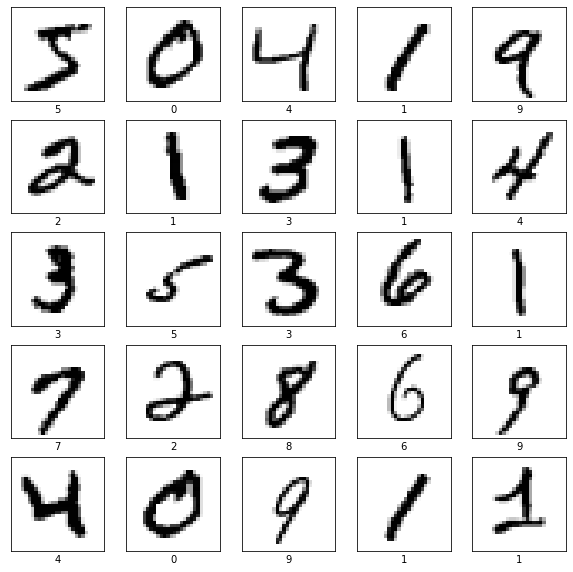

In [5]:
#viewing some data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [6]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [7]:
x_train = (x_train/255)-0.5
x_test = (x_test/255)-0.5

In [8]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)


print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [9]:
model = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=(28,28,1), kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),


    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),

 Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
])


In [10]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
      optimizer='adam',
      metrics=['accuracy'])

In [14]:
#fitting the model
batch_size = 128
epochs = 10

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0251 - accuracy: 0.9921 - val_loss: 0.0231 - val_accuracy: 0.9939
Epoch 2/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0219 - val_accuracy: 0.9935
Epoch 3/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0238 - val_accuracy: 0.9935
Epoch 4/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0217 - accuracy: 0.9931 - val_loss: 0.0217 - val_accuracy: 0.9936
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0193 - val_accuracy: 0.9945
Epoch 6/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0190 - val_accuracy: 0.9951
Epoch 7/10
469/469 [==============================] - 7s 14ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.0211 - val_accuracy: 0.9941

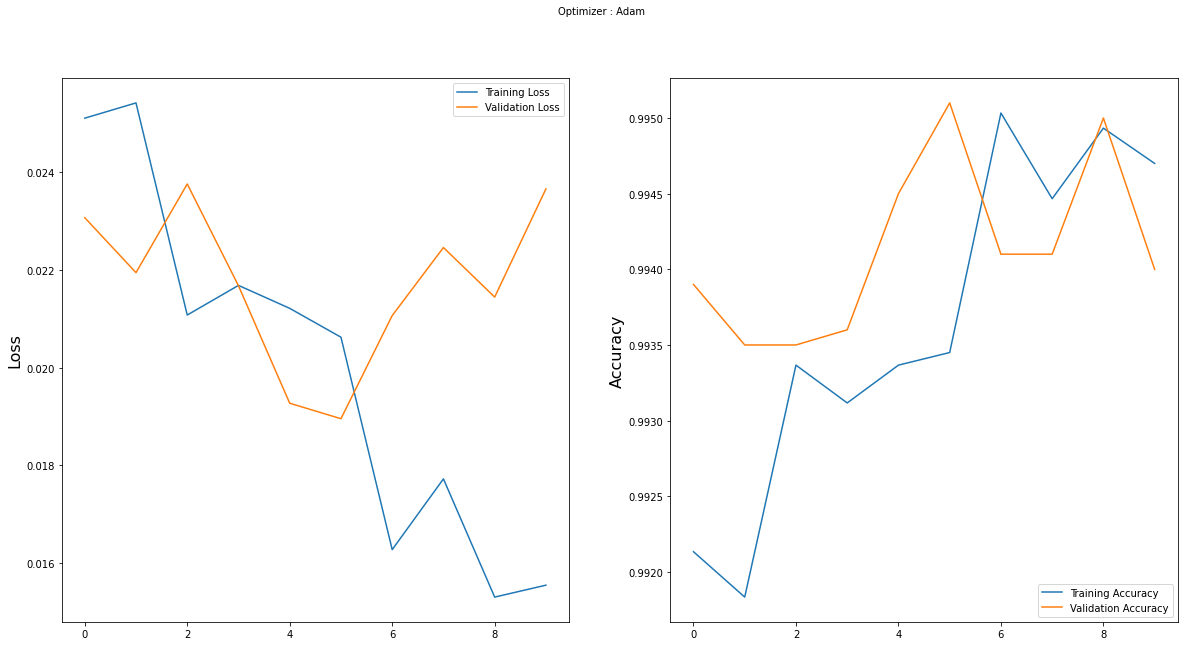

In [15]:


# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()



In [40]:
#make predictions
predictions=model.predict(x_test)
labels_pred=np.argmax(predictions,axis=1)
print(labels_pred[:16])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


In [41]:
print(y_test[:16])

#so we can see above that our predictions matches our y_test labels

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5]


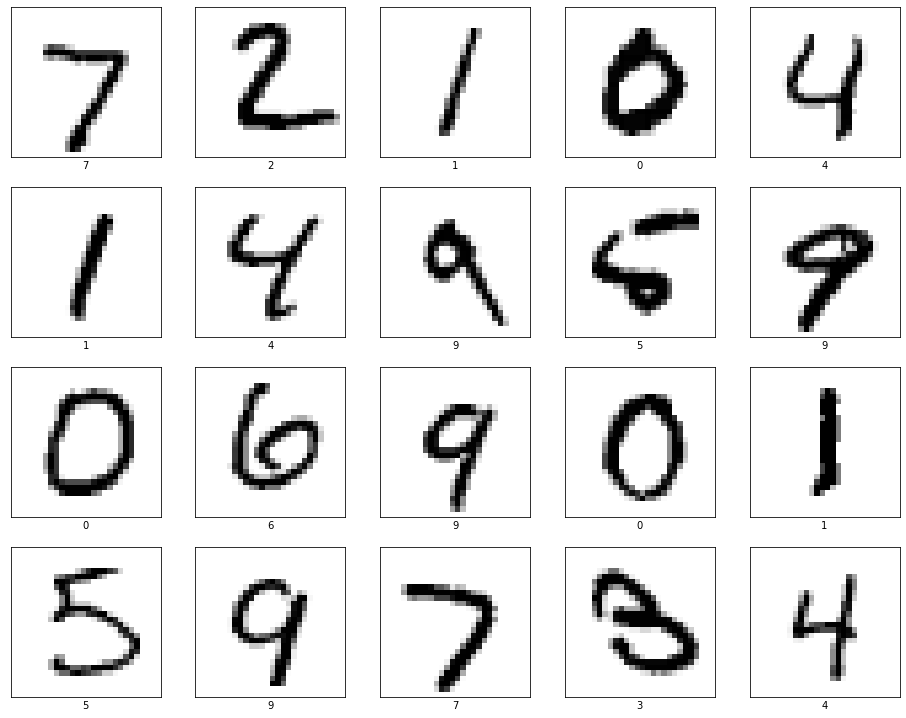

In [42]:
plt.figure(figsize=(16,16))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    first_img=x_test[i]
    first_img=np.array(first_img,dtype='float',)
    pixels=first_img.reshape((28,28))
    plt.imshow(pixels, cmap=plt.cm.binary)
    plt.xlabel(labels_pred[i])
plt.show()